# Part 3

You are given a list of integers, A, and another integer s. Write an algorithm that outputs all the pairs in A that equal s.
For example, if
A = [7, -2, 8, 2, 6, 4, -7, 2, 1, 3, -3] and s = 4
the algorithm should output: (7, -3), (-2, 6), (2, 2), (3, 1).

In [1]:
from random import randint

The easy way to solve the problem would be implementing a brute force method, which would lead to a complexity equal to $O(n^2)$.\
We managed to implement an algorithm that, making use of sort method of a list ($O(n\, log(n)$) and a cycle in which we use two indexes (more details in the code, below) solves the problem in $O(n\, log(n))$ [removing constants].

In [2]:
def findPairs(A,s):
    pairs=[]
    A.sort                                   #First sort the array O(nlogn)
    start=0                                  #We define 2 indexes to go through the list A, and verify wheter the sum
    end=len(A)-1                             #of A[index1=start]+A[index2=end] is equal to the given sum, in the case it
                                             #is we store the value and keep looking for other values
                                             #if it's not we check if that's greater or not of the given sum:
    while start<end:                         #in the case it is we decrease the second index (end) while in the other
                                             #case we increase the first index (start)
        if A[start]+A[end]==s: 
            pairs.append((A[start],A[end]))
            start+=1
    
        elif A[start]+A[end]<s:
            start+=1
            
        else:
            end-=1
            
    return pairs

In [3]:
N=10
for i in range(5):
    A=[]
    if i!=0: N*=10
    for i in range(N):
        A.append(randint(-50, 50))
    print(N)
    %timeit pairs=findPairs(A,10)

10
1.2 µs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
100
12.9 µs ± 251 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
1000
134 µs ± 4.16 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
10000
1.35 ms ± 19.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
100000
13.6 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Part 1

## 1.1

In [1]:
import numpy as np      
import matplotlib.pyplot as plt 
import scipy.io.wavfile 
import subprocess
import librosa
import librosa.display
import IPython.display as ipd

from pathlib import Path, PurePath   
from tqdm.notebook import tqdm

In [2]:
def convert_mp3_to_wav(audio:str) -> str:  
    """Convert an input MP3 audio track into a WAV file.

    Args:
        audio (str): An input audio track.

    Returns:
        [str]: WAV filename.
    """
    if audio[-3:] == "mp3":
        wav_audio = audio[:-3] + "wav"
        if not Path(wav_audio).exists():
                subprocess.check_output(f"ffmpeg -i {audio} {wav_audio}", shell=True)
        return wav_audio
    
    return audio

def plot_spectrogram_and_picks(track:np.ndarray, sr:int, peaks:np.ndarray, onset_env:np.ndarray) -> None:
    """[summary]

    Args:
        track (np.ndarray): A track.
        sr (int): Aampling rate.
        peaks (np.ndarray): Indices of peaks in the track.
        onset_env (np.ndarray): Vector containing the onset strength envelope.
    """
    times = librosa.frames_to_time(np.arange(len(onset_env)),
                            sr=sr, hop_length=HOP_SIZE)

    plt.figure()
    ax = plt.subplot(2, 1, 2)
    D = librosa.stft(track)
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                            y_axis='log', x_axis='time')
    plt.subplot(2, 1, 1, sharex=ax)
    plt.plot(times, onset_env, alpha=0.8, label='Onset strength')
    plt.vlines(times[peaks], 0,
            onset_env.max(), color='r', alpha=0.8,
            label='Selected peaks')
    plt.legend(frameon=True, framealpha=0.8)
    plt.axis('tight')
    plt.tight_layout()
    plt.show()

def load_audio_picks(audio, duration, hop_size):
    """[summary]

    Args:
        audio (string, int, pathlib.Path or file-like object): [description]
        duration (int): [description]
        hop_size (int): 

    Returns:
        tuple: Returns the audio time series (track) and sampling rate (sr), a vector containing the onset strength envelope
        (onset_env), and the indices of peaks in track (peaks).
    """
    try:
        track, sr = librosa.load(audio, duration=duration)
        onset_env = librosa.onset.onset_strength(track, sr=sr, hop_length=hop_size)
        peaks = librosa.util.peak_pick(onset_env, 10, 10, 10, 10, 0.5, 0.5)
    except Error as e:
        print('An error occurred processing ', str(audio))
        print(e)

    return track, sr, onset_env, peaks

### Settings

In [3]:
N_TRACKS = 1413
HOP_SIZE = 512
DURATION = 30 # TODO: to be tuned!
THRESHOLD = 0 # TODO: to be tuned!

In [4]:
data_folder = Path("archive/mp3s-32k/")
mp3_tracks = data_folder.glob("*/*/*.mp3")
tracks = data_folder.glob("*/*/*.wav") 

### Preprocessing

In [ ]:
for track in tqdm(mp3_tracks, total=N_TRACKS):
    convert_mp3_to_wav(str(track))

### Audio signals

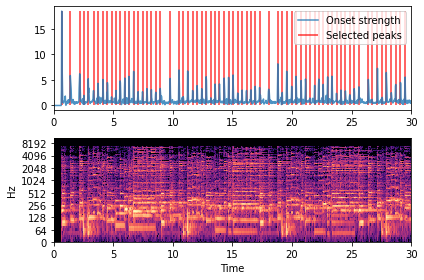

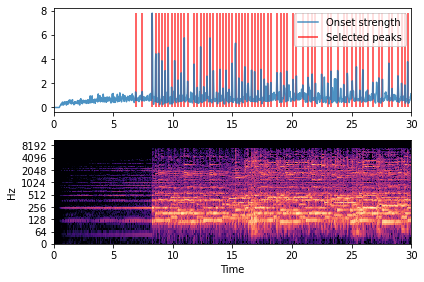

In [5]:
for idx, audio in enumerate(tracks):
    if idx >= 2:
        break
    track, sr, onset_env, peaks = load_audio_picks(audio, DURATION, HOP_SIZE)
    plot_spectrogram_and_picks(track, sr, peaks, onset_env)

In [13]:
len(track)

661500

In [16]:
len(peaks)

69

In [22]:
len(onset_env) #detect the onset (dove comincia la nota)

1292

In [21]:
sr #sampling rate of track

22050

## 1.2